## Demo Kmean cho kho√° lu·∫≠n t·ªët nghi·ªáp

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from pathlib import Path

In [3]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns


### T·∫°o d·ªØ li·ªáu m·∫´u

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pathlib import Path

# ---------------------- H√†m sinh d·ªØ li·ªáu ----------------------
def prepare_data_smart(n_samples: int = 5_000, random_state: int | None = None):
    """
    Sinh d·ªØ li·ªáu h√†nh vi h·ªçc t·∫≠p m√¥ ph·ªèng c√≥ t∆∞∆°ng quan logic.
    Tr·∫£ v·ªÅ:
      ‚Ä¢ df  : DataFrame ƒë·∫ßy ƒë·ªß (g·ªìm c·ªôt quiz_score)
      ‚Ä¢ X   : ndarray ch·ªâ ch·ª©a feature (d√πng cho ML, b·ªè c·ªôt quiz_score)
    """
    rng = np.random.default_rng(random_state)

    engagement = rng.beta(a=2, b=5, size=n_samples)

    video_views = np.clip(rng.poisson(lam=engagement * 10), 0, 15)
    quiz_done_theory = np.clip(rng.poisson(lam=engagement * 8), 0, 10)
    quiz_done_application = np.clip(
        rng.binomial(n=quiz_done_theory, p=0.5), 0, None
    )
    pdf_views = np.clip(
        rng.poisson(lam=video_views * rng.uniform(0.2, 0.6, n_samples)), 0, 10
    )

    chapter = rng.choice([1, 2, 3, 4, 5, 6], size=n_samples,
                         p=[0.25, 0.20, 0.18, 0.15, 0.12, 0.10])
    chapter = np.clip(chapter + (engagement * 2).astype(int), 1, 6)

    noise = rng.normal(0, 1.2, n_samples)
    quiz_score_raw = (
        0.6 * (quiz_done_theory + quiz_done_application)
        + 0.2 * video_views
        + noise
    )
    quiz_score = np.round(np.clip(quiz_score_raw / 2, 0, 10)).astype(int)

    df = pd.DataFrame({
        "video_views": video_views,
        "quiz_done_theory": quiz_done_theory,
        "quiz_done_application": quiz_done_application,
        "pdf_views": pdf_views,
        "chapter": chapter,
        "quiz_score": quiz_score,
    })

    X = df.drop(columns="quiz_score").values
    return df, X
# ------------------- K·∫øt th√∫c ƒë·ªãnh nghƒ©a h√†m -------------------

# 1) G·ªçi h√†m, sinh 5 000 b·∫£n ghi
df_full, X = prepare_data_smart(n_samples=5_000, random_state=42)

# 2) Chia train / test (80 % ‚Äì 20 %)
train_df, test_df = train_test_split(
    df_full, test_size=0.2, random_state=42, shuffle=True
)

# 3) ƒê·ªãnh nghƒ©a ƒë∆∞·ªùng d·∫´n l∆∞u (th∆∞ m·ª•c 'data' n·∫±m c·∫°nh script)
data_dir = Path("data")
data_dir.mkdir(parents=True, exist_ok=True)

full_path = data_dir / "smart_data_full.csv"
train_path = data_dir / "smart_data_train.csv"
test_path = data_dir / "smart_data_test.csv"

# 4) Ghi ra file CSV (kh√¥ng k√®m ch·ªâ s·ªë d√≤ng)
df_full.to_csv(full_path, index=False)
train_df.to_csv(train_path, index=False)
test_df.to_csv(test_path, index=False)

print(f"‚úÖ ƒê√£ l∆∞u:\n  ‚Ä¢ {full_path}\n  ‚Ä¢ {train_path}\n  ‚Ä¢ {test_path}")

‚úÖ ƒê√£ l∆∞u:
  ‚Ä¢ data/smart_data_full.csv
  ‚Ä¢ data/smart_data_train.csv
  ‚Ä¢ data/smart_data_test.csv


### Ph√¢n c·ª•m

In [5]:
# --------------------- G·ªçi h√†m & ph√¢n c·ª•m ---------------------
# KMeans v·ªõi 3 c·ª•m
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# G·∫Øn nh√£n c·ª•m
df_full["cluster"] = labels

# --------------------- G√°n t√™n c·ª•m ---------------------
# G√°n t√™n c·ª•m m√¥ t·∫£ theo ƒë·∫∑c tr∆∞ng (t√πy v√†o ph√¢n t√≠ch)
cluster_names = {
    0: "Skipper (ƒëi nhanh, √≠t h·ªçc)",
    1: "Newbie (m·ªõi b·∫Øt ƒë·∫ßu)",
    2: "Active learner (h·ªçc chƒÉm)"
}

df_full["cluster_name"] = df_full["cluster"].map(cluster_names)

### L∆∞u 3 c·ª•m v√†o t·ª´ng file csv t∆∞∆°ng ·ª©ng

In [6]:
# --------------------- L∆ØU M·ªñI C·ª§M RA 1 FILE ---------------------
from pathlib import Path

data_dir = Path("data")        # th∆∞ m·ª•c ƒë√£ c√≥ s·∫µn
for cid, grp in df_full.groupby("cluster"):
    out_path = data_dir / f"cluster{cid}.csv"
    grp.to_csv(out_path, index=False)
    print(f"‚úÖ ƒê√£ l∆∞u c·ª•m {cid} ({cluster_names[cid]}) ‚Üí {out_path}")

‚úÖ ƒê√£ l∆∞u c·ª•m 0 (Skipper (ƒëi nhanh, √≠t h·ªçc)) ‚Üí data/cluster0.csv
‚úÖ ƒê√£ l∆∞u c·ª•m 1 (Newbie (m·ªõi b·∫Øt ƒë·∫ßu)) ‚Üí data/cluster1.csv
‚úÖ ƒê√£ l∆∞u c·ª•m 2 (Active learner (h·ªçc chƒÉm)) ‚Üí data/cluster2.csv


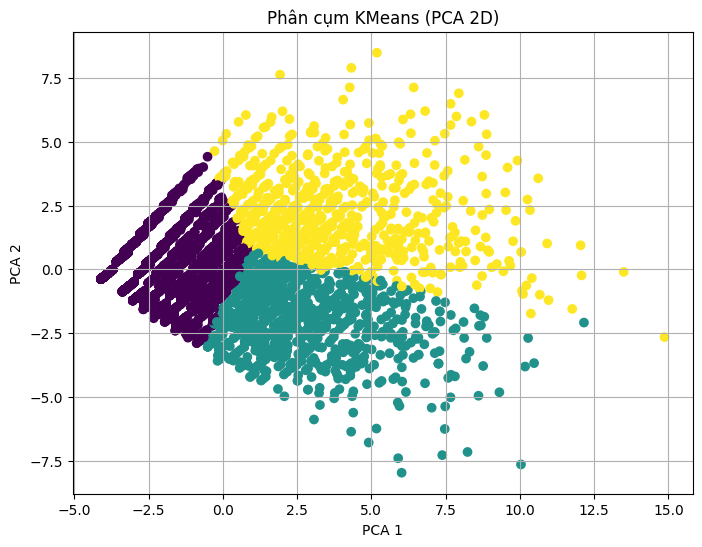

In [7]:
# --------------------- PCA 2D ---------------------
pca_2d = PCA(n_components=2, random_state=42)
X_2d = pca_2d.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis')
plt.title("Ph√¢n c·ª•m KMeans (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

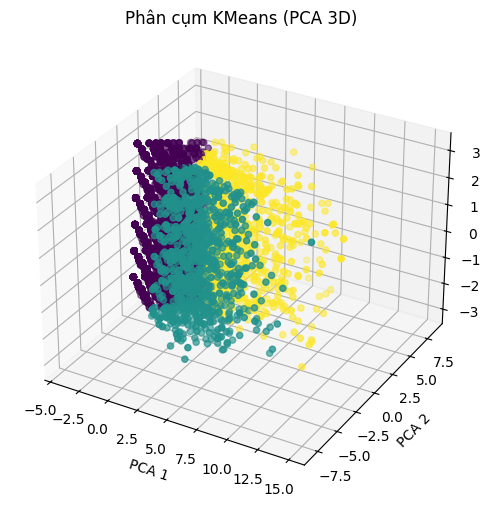

In [8]:
# --------------------- PCA 3D ---------------------
pca_3d = PCA(n_components=3, random_state=42)
X_3d = pca_3d.fit_transform(X)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=labels, cmap='viridis')
ax.set_title("Ph√¢n c·ª•m KMeans (PCA 3D)")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.show()

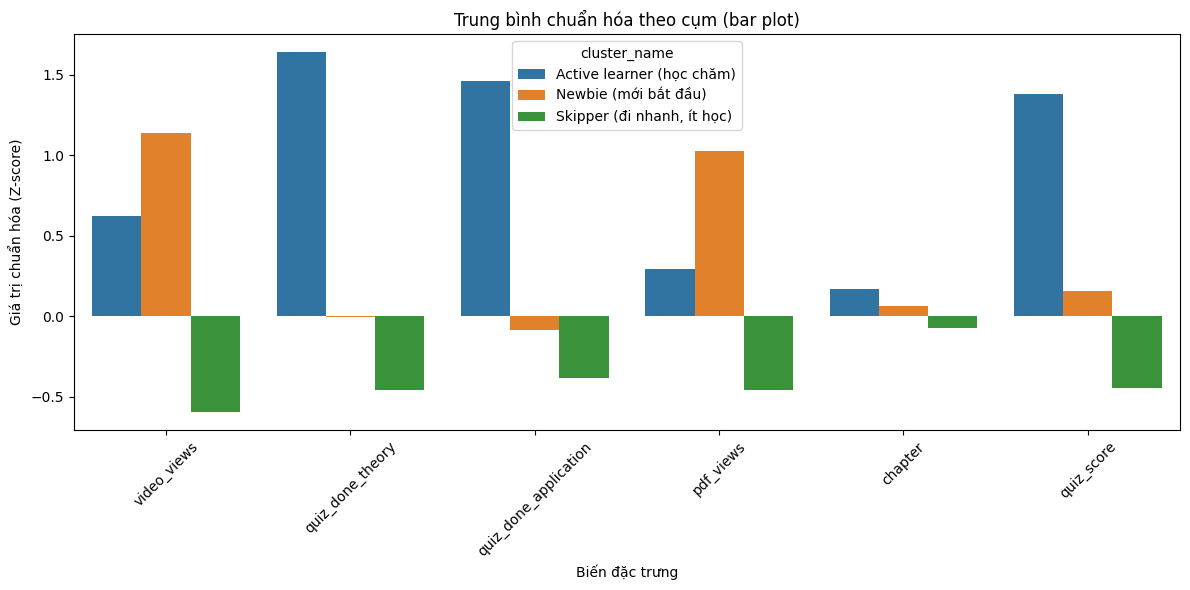

/var/folders/g4/mfpnrdbj2zj_69p2jw0y5nnc0000gn/T/ipykernel_39737/2599167766.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_scaled, x="cluster_name", y=feat,


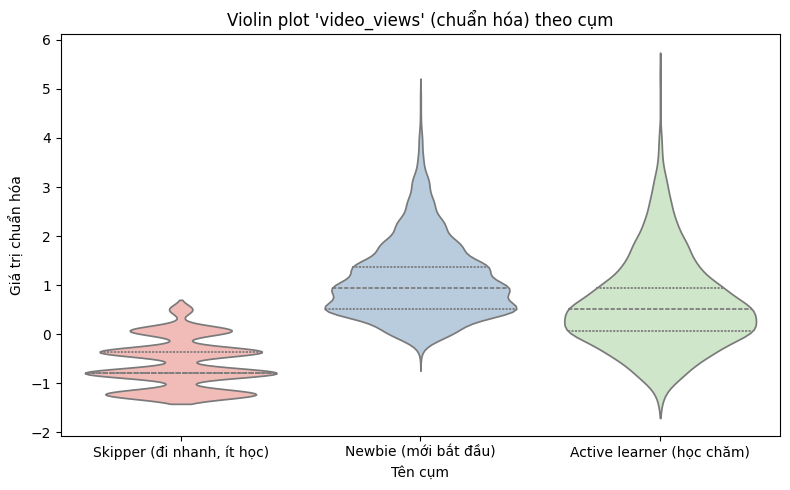

/var/folders/g4/mfpnrdbj2zj_69p2jw0y5nnc0000gn/T/ipykernel_39737/2599167766.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_scaled, x="cluster_name", y=feat,


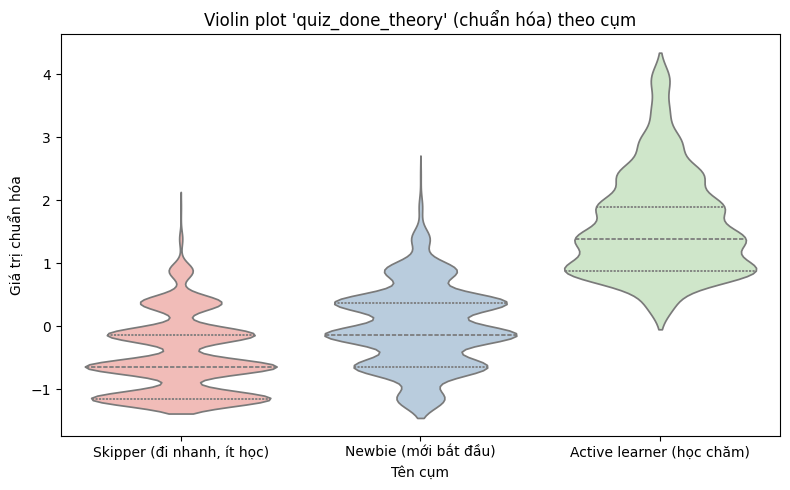

/var/folders/g4/mfpnrdbj2zj_69p2jw0y5nnc0000gn/T/ipykernel_39737/2599167766.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_scaled, x="cluster_name", y=feat,


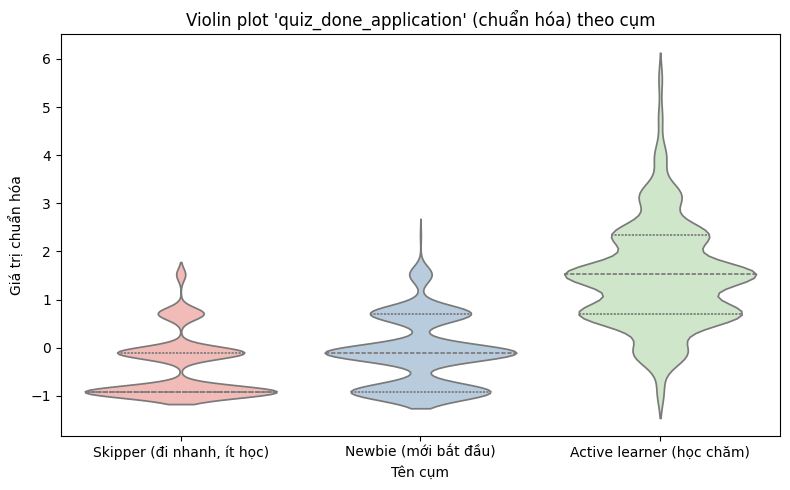

/var/folders/g4/mfpnrdbj2zj_69p2jw0y5nnc0000gn/T/ipykernel_39737/2599167766.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_scaled, x="cluster_name", y=feat,


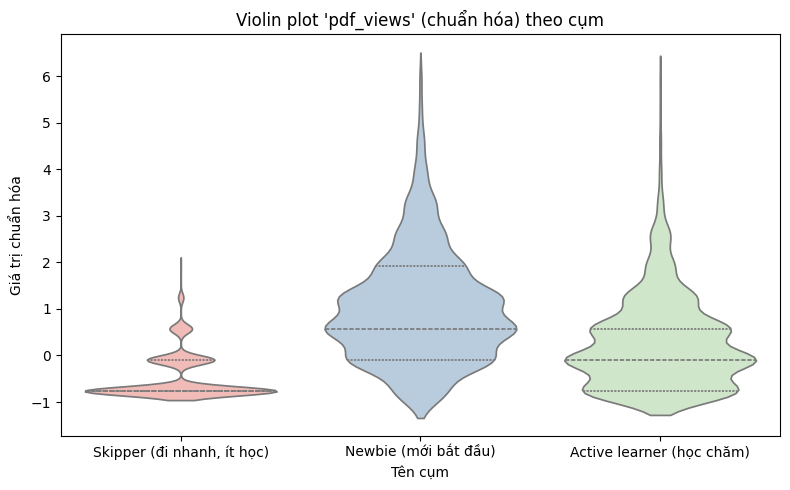

/var/folders/g4/mfpnrdbj2zj_69p2jw0y5nnc0000gn/T/ipykernel_39737/2599167766.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_scaled, x="cluster_name", y=feat,


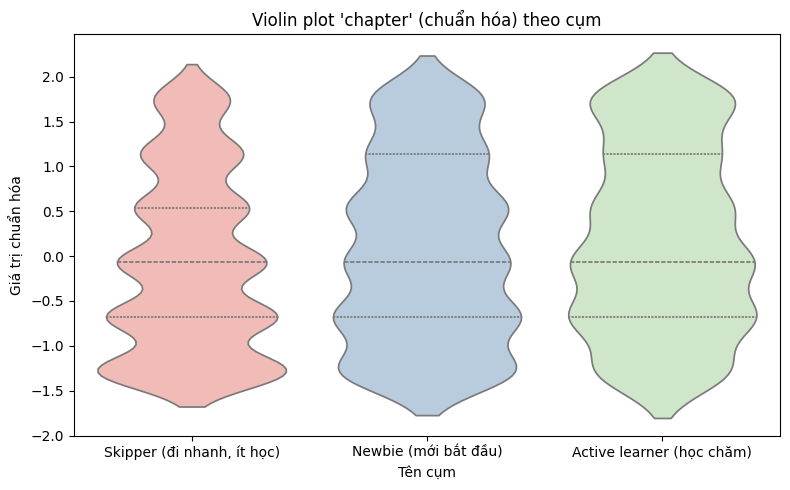

/var/folders/g4/mfpnrdbj2zj_69p2jw0y5nnc0000gn/T/ipykernel_39737/2599167766.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_scaled, x="cluster_name", y=feat,


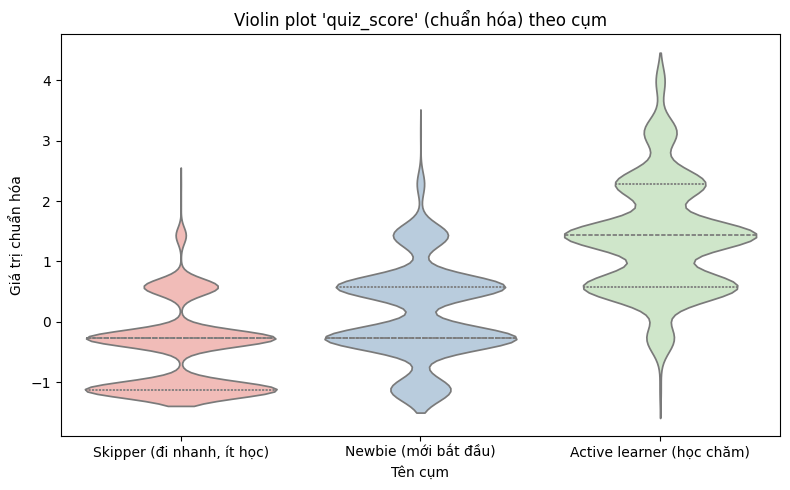

In [9]:
# ---------------- 5) Bar-plot & violin-plot ----------------
plot_dir = Path("output_plots")
plot_dir.mkdir(exist_ok=True)

features = ["video_views", "quiz_done_theory", "quiz_done_application",
            "pdf_views", "chapter", "quiz_score"]

# 5-a) Bar plot (chu·∫©n h√≥a)
scaler = StandardScaler()
df_scaled = df_full.copy()
df_scaled[features] = scaler.fit_transform(df_full[features])

bar_data = (df_scaled.groupby("cluster_name")[features]
            .mean().reset_index().melt(id_vars="cluster_name"))

plt.figure(figsize=(12, 6))
sns.barplot(data=bar_data, x="variable", y="value", hue="cluster_name")
plt.title("Trung b√¨nh chu·∫©n h√≥a theo c·ª•m (bar plot)")
plt.ylabel("Gi√° tr·ªã chu·∫©n h√≥a (Z-score)")
plt.xlabel("Bi·∫øn ƒë·∫∑c tr∆∞ng")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(plot_dir / "bar_means_scaled.png", dpi=300)
plt.show()

# 5-b) Violin plot
for feat in features:
    plt.figure(figsize=(8, 5))
    sns.violinplot(data=df_scaled, x="cluster_name", y=feat,
                   palette="Pastel1", inner="quartile")
    plt.title(f"Violin plot '{feat}' (chu·∫©n h√≥a) theo c·ª•m")
    plt.xlabel("T√™n c·ª•m"); plt.ylabel("Gi√° tr·ªã chu·∫©n h√≥a")
    plt.tight_layout()
    plt.savefig(plot_dir / f"violin_{feat}.png", dpi=300)
    plt.show()

In [10]:
# --------------------- Trung b√¨nh t·ª´ng c·ª•m ---------------------
cluster_summary = df_full.groupby("cluster_name").mean(numeric_only=True).round(2)
print("\nüìä Trung b√¨nh c√°c ƒë·∫∑c tr∆∞ng theo t·ª´ng c·ª•m:")
print(cluster_summary)


üìä Trung b√¨nh c√°c ƒë·∫∑c tr∆∞ng theo t·ª´ng c·ª•m:
                            video_views  quiz_done_theory  \
cluster_name                                                
Active learner (h·ªçc chƒÉm)          4.27              5.49   
Newbie (m·ªõi b·∫Øt ƒë·∫ßu)               5.47              2.25   
Skipper (ƒëi nhanh, √≠t h·ªçc)         1.45              1.35   

                            quiz_done_application  pdf_views  chapter  \
cluster_name                                                            
Active learner (h·ªçc chƒÉm)                    2.93       1.58     3.39   
Newbie (m·ªõi b·∫Øt ƒë·∫ßu)                         1.02       2.67     3.22   
Skipper (ƒëi nhanh, √≠t h·ªçc)                   0.66       0.45     3.00   

                            quiz_score  cluster  
cluster_name                                     
Active learner (h·ªçc chƒÉm)         2.94      2.0  
Newbie (m·ªõi b·∫Øt ƒë·∫ßu)              1.50      1.0  
Skipper (ƒëi nhanh, √≠t h·ªçc)    

In [11]:
# --------------------- L∆∞u k·∫øt qu·∫£ ---------------------
output_dir = Path("output")
output_dir.mkdir(exist_ok=True)

df_full.to_csv(output_dir / "clustered_data.csv", index=False)
cluster_summary.to_csv(output_dir / "cluster_summary.csv")

print("\n‚úÖ D·ªØ li·ªáu ƒë√£ l∆∞u v√†o th∆∞ m·ª•c 'output/'")


‚úÖ D·ªØ li·ªáu ƒë√£ l∆∞u v√†o th∆∞ m·ª•c 'output/'
